<a href="https://colab.research.google.com/github/aamir-ansari-44/Study/blob/main/Intro%20to%20ML%20and%20NN/06_07_polyreg_biasvariance_regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Regularization**

#### Which features are useful to have a perfectly fit model?



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/112/original/Screenshot_2023-08-16_at_6.54.12_PM.png?1692192581_' width=800></center>






<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/113/original/Screenshot_2023-08-16_at_6.54.20_PM.png?1692192624' width=800></center>





#### Understanding the new Loss function



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/114/original/Screenshot_2023-08-16_at_6.54.27_PM.png?1692192643' width=800></center>





#### How to get that sweet spot between loss function and Regularization ?



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/115/original/Screenshot_2023-08-16_at_6.54.34_PM.png?1692192678' width=800></center>






#### How does $\lambda$ creates that sweet spot between MSE and Regularization term ?

Ans: With a **right $\lambda$ value** :

1. There is **enough freedom to MSE** so that:
  - The **weights are  optimized** to reach the **lowest possible MSE value**
  - Which **does not lead to overfitting**

2. It also provide **enough freedom to Regularization term** so that:
 - The regularization term can make the weights of the model close to 0
 - Which **does not lead to underfitting**

<br>

**Note:** The term $w_j^2$ is called as L2/Ridge Regularization



## **Points to Remember**



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/117/original/Screenshot_2023-08-16_at_6.54.48_PM.png?1692192728' width=800></center>




## **L-1 Regularization**

#### What do you think, will $\sum_{j=1}^{d} |w_j|$ work ?



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/120/original/Screenshot_2023-08-16_at_6.55.09_PM.png?1692192872' width=800></center>





<center><img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/123/original/Screenshot_2023-08-16_at_7.33.45_PM.png?1692194777 width=800></center>

## **Interesting property of L1 and L2 Reg**

#### When to use L1, L2 Regularization ?

<center><img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/124/original/Screenshot_2023-08-16_at_7.34.47_PM.png?1692194929 width=800></center>

#### Why does L1 create a sparse W and L2 does not ?



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/121/original/Screenshot_2023-08-16_at_6.55.16_PM.png?1692192926' width=800></center>




#### If you are not sure which regularization to use, is there a way to combine both L1 and L2 ?



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/122/original/Screenshot_2023-08-16_at_6.59.22_PM.png?1692192957' width=800></center>




## **L1, L2 Regularization Code**

#### Using Sklearn diabetes data - https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset


<img src= https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/110/original/Screenshot_2023-08-16_at_6.03.47_PM.png?1692189250 width=800>

In [ ]:
from sklearn import datasets

data = datasets.load_diabetes()

In [ ]:
X = data['data']

y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the features into polynomial features
degree = 8
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
# Standardize the polynomial features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

Using Sklearn's Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)

output = model.predict(X_test_poly_scaled)


taking MSE and $R^2$ as metric instead of Adj.R-sq

In [ ]:
from sklearn.metrics import mean_squared_error

print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))

MSE for test: 89165.53605616212
MSE for train: 3.0273860289443658e-24


In [ ]:
print("R^2 for train:",model.score(X_train_poly_scaled,y_train))
print('R^2 for test:',model.score(X_test_poly_scaled,y_test))

R^2 for train: 1.0
R^2 for test: -15.829554963412864


**observe**
- Clearly polynomial regression with degree=8 overfits

Lets see how L1 and L2 regularisation work

In [ ]:
from sklearn.linear_model import Lasso, Ridge

taking a very small alpha

In [ ]:
lasso_model = Lasso(alpha=0.001)  # Alpha is the regularization strength #L1
ridge_model = Ridge(alpha=0.001)    # Alpha is the regularization strength #L2

In [ ]:

# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.658e+03, tolerance: 2.145e+02
  model = cd_fast.enet_coordinate_descent(


Ridge(alpha=0.001)

In [ ]:

lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

In [ ]:
print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

test MSE for L1: 56375.166621619835
test MSE for L2: 89127.31439266077


In [ ]:
print("R^2 for lasso:",lasso_model.score(X_test_poly_scaled,y_test))
print('R^2 for ridge:',ridge_model.score(X_test_poly_scaled,y_test))

R^2 for lasso: -9.640534529310903
R^2 for ridge: -15.822340813023146


No such improvement in test performance

taking extremely high alpha

In [ ]:
lasso_model = Lasso(alpha=1e10)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1e10)    # Alpha is the regularization strength

# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

print("R^2 for lasso:",lasso_model.score(X_test_poly_scaled,y_test))
print('R^2 for ridge:',ridge_model.score(X_test_poly_scaled,y_test))

test MSE for L1: 5361.533457238513
test MSE for L2: 5361.437117416974
R^2 for lasso: -0.011962984778542296
R^2 for ridge: -0.011944801112593773


Quite better test performance

taking some reasonable alpha

In [ ]:
lasso_model = Lasso(alpha=1e1)  # Alpha is the regularization strength
ridge_model = Ridge(alpha=1e3)    # Alpha is the regularization strength

# Fit the models to the training data
lasso_model.fit(X_train_poly_scaled, y_train)
ridge_model.fit(X_train_poly_scaled, y_train)

lasso_predictions = lasso_model.predict(X_test_poly_scaled)
ridge_predictions = ridge_model.predict(X_test_poly_scaled)

print('test MSE for L1:', mean_squared_error(y_test, lasso_predictions))
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

print("R^2 for lasso:",lasso_model.score(X_test_poly_scaled,y_test))
print('R^2 for ridge:',ridge_model.score(X_test_poly_scaled,y_test))

test MSE for L1: 2853.8774245650693
test MSE for L2: 3999.5295195330687
R^2 for lasso: 0.4613447179265656
R^2 for ridge: 0.24510853796272003


<center><img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/125/original/Screenshot_2023-08-16_at_7.35.10_PM.png?1692194983 width=800> </center>

<center><img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/043/126/original/Screenshot_2023-08-16_at_7.35.19_PM.png?1692195015 width=800> </center>

## HyperParameter Tuning

Let's use the code to create X and Y as we did in last lecture

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)

#0.8, 0.2 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
def adj_r2(X, y, r2_score):
  return 1 - ((1-r2_score)*(len(y)-1))/(len(y)-X.shape[1]-1)


In the last lecture, we found that the optimal degree would be somewhere around 2,3.

But just to see, if regualarisation helps in controlling overfitting, lets take a higher and see how to optimize our regularization rate.

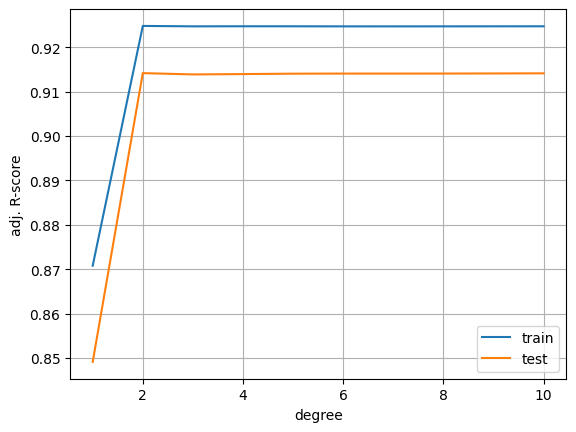

In [ ]:
max_degree = 11 # max polynomial degree
train_scores = []
test_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  test_score= adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
  train_scores.append(train_score)
  test_scores.append(test_score)

plt.figure()
plt.plot(list(range(1, 11)), train_scores, label="train")
plt.plot(list(range(1, 11)), test_scores, label="test")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [ ]:
train_scores = []
test_scores = []
rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(8), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score= polyreg_scaled.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

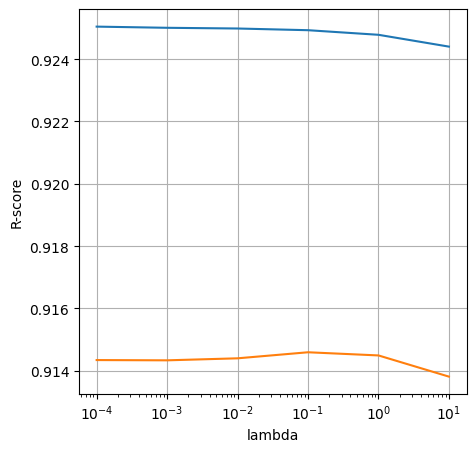

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="test")
plt.xlabel("lambda")
plt.ylabel("R-score")
plt.xscale("log")
plt.grid()
plt.show()

In [ ]:
print("Best lambda:", rate_list[np.argmax(test_scores)])

Best lambda: 0.1


## Cross-Validation


<img src='https://drive.google.com/uc?id=1zZ0u8qLOx129ul1nCE64jc6uBth9QA5n' width=800>


#### So how do we perform cross validation?

In [ ]:
# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)


Now we divide our data into train, test and validation

In [ ]:
#0.6, 0.2, 0.2 split
from sklearn.model_selection import train_test_split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((600, 1), (200, 1), (200, 1))

Let's visualize our data

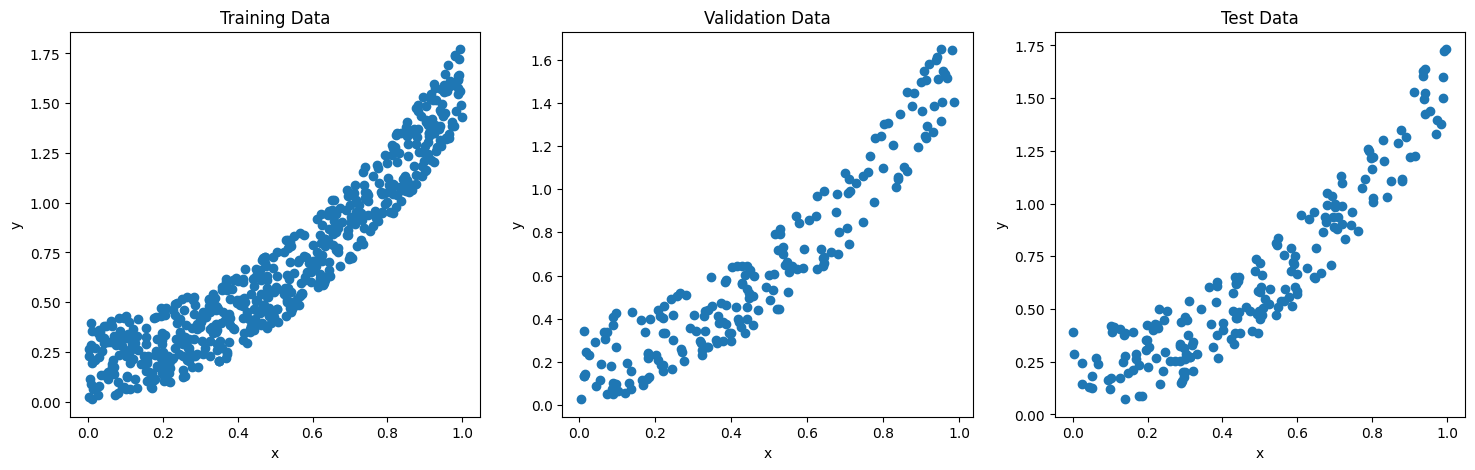

In [ ]:
plt.figure(figsize=(18,5))
data_labels = ["Training Data", "Validation Data", "Test Data" ]
x_labels = [X_train, X_val, X_test]
y_labels = [y_train, y_val, y_test]
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.scatter(x_labels[i], y_labels[i])
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(data_labels[i])

The statistics of our type of data is similar, so we are good to go.

#### Steps to do cross-validation on our data



Now if you remember, in the last lecture we saw how the performance was increasing with increase in degree of the polynomial model

But how do we find the optimal degree in this case?

Let's

Let's try to find the optimal value of `degree` for our polynomial regression model

1. First we take degrees from 1 to 25, and train the model on data for each of these degrees to find the best degree

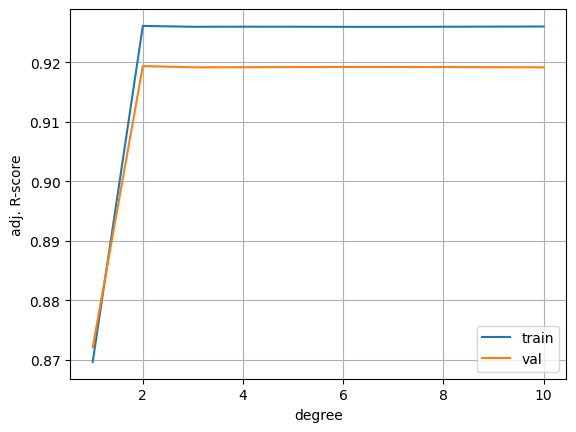

In [ ]:
# Same as before
max_degree = 11 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)
plt.figure()
plt.plot(list(range(1, 11)), train_scores, label="train")
plt.plot(list(range(1, 11)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

Taking degree=3, we now find the best regularization rate by the same process

In [ ]:
train_scores = []
val_scores = []
rate_list = [0.01, 0.1, 1,5, 10]
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

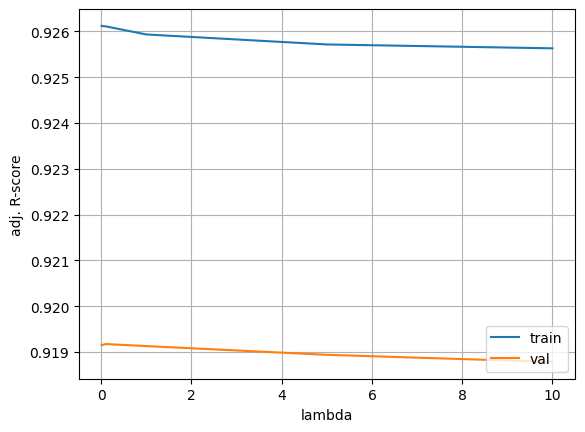

In [ ]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

We take the optimal value of lambda as 0.01

2. Now finally, we measure our model's performance on test data, which our model hasn't seen till now

In [ ]:
polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=0.01))
polyreg_scaled.fit(X_train, y_train)
train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
print(f'Training Score = {train_score}')
val_score = adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
print(f'Validation Score = {val_score}')

Training Score = 0.9261212571628987
Validation Score = 0.9191482611247953


In [ ]:
# Reporting this as the final score
test_score = adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
print(f'Testing Score = {test_score}')

Testing Score = 0.9143625261065258


## K-Fold Cross Validation

This is useful only for small datasets

#### What is k-fold cross validation?



<img src='https://drive.google.com/uc?id=1dkxPt6DY0U4T-AwFREYkBHQaA1EVqScP' width=800>


#### How to implement K-Fold Cross validation?


<img src='https://drive.google.com/uc?id=1J4IerGUseEHGqonulMJ2QYQfOLmfb8-T' width=800>

In [ ]:
# Creating a small dataset of 100 data points
np.random.seed(2)
X = np.random.rand(100,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(100,1)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [ ]:
# Performing k-fold cross validation
degrees = 11 # number of degrees
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model

        train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
        val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

        fold_train_scores.append(train_score)
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores)
    val_score = np.mean(fold_val_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

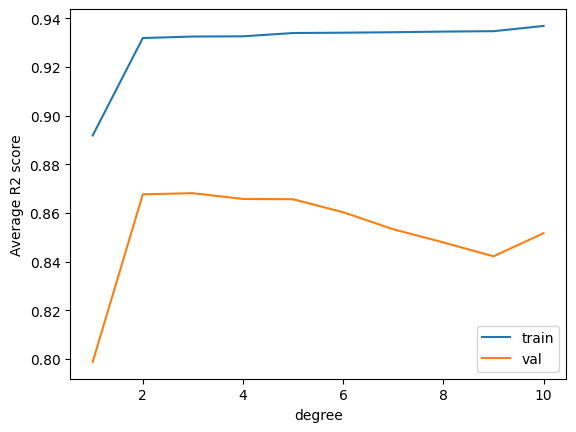

In [ ]:
plt.figure()
plt.plot(list(range(1, 11)), train_scores, label="train")
plt.plot(list(range(1, 11)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Average R2 score")
plt.show()

----